# Predict the Lengths of Stay

### Why is it important to predict the lengths of Stay (LOS)?
- Hospital care costs make up 1/3 of US health spending <sup>1
- Medicare reimbursement, the Inpatient Prospective Payment System Rule (IPPS), determines payments by case, not days of stay. Thus, hospitals would like to identify patient with high LOS risk.
-  In 126 counties, the average hospital is at least 90% occupied, according to an analysis of the data by the COVID-19 Hospitalization Tracking Project <sup>2
- Help with the logistics of the hospital: optimizing patient flow, minimal waiting, minimal exposure to risks associated with hospitalization, and efficient use of resources such as hospital beds, medical equipment and available clinical staff.


In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [219]:
df=pd.read_csv("train_data.csv")
df.duplicated().sum()

0

In [220]:
df.set_index('case_id',inplace=True)

In [41]:
#Missing values
df.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

## Exploring the data

<AxesSubplot:title={'center':'Case counts by lengths of stay'}, xlabel='Stay'>

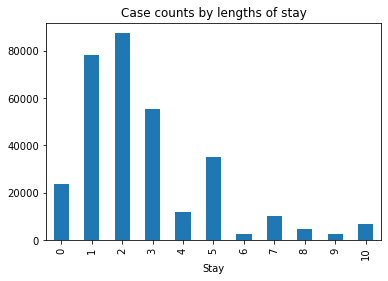

In [236]:
stays=df.groupby('Stay').size()
stays.plot(kind='bar',title="Case counts by lengths of stay")

In [253]:
df.describe()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000,318438.000000
mean,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392,2.698550
std,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254,2.150075
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000,0.000000
25%,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000,1.000000
50%,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000,2.000000
75%,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000,3.000000
max,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000,10.000000


<AxesSubplot:title={'center':'Case counts by lengths of stay'}>

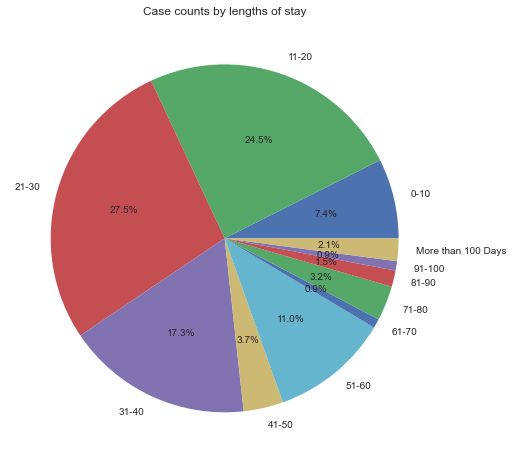

In [250]:
plt.style.use('seaborn')
plt.subplots(figsize=(8,8))
stays.plot(kind="pie",autopct='%1.1f%%',labels=map_stay.keys(),ylabel="",title="Case counts by lengths of stay")

In [ ]:
le=preprocessing.LabelEncoder()
df['Stay']=le.fit_transform(df['Stay'])
map_stay = dict(zip(le.classes_, range(len(le.classes_))))

<AxesSubplot:title={'center':'Case counts by hospital'}, xlabel='Hospital_code'>

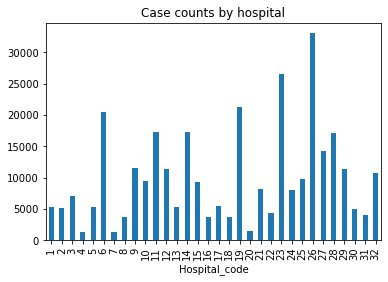

In [34]:
hospitals = df.groupby('Hospital_code').size()
hospitals.plot(kind='bar',title="Case counts by hospital")

<AxesSubplot:title={'center':'Case counts by hospital type'}, xlabel='Hospital_type_code'>

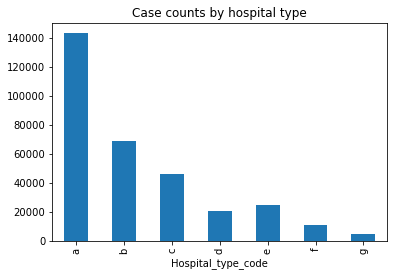

In [36]:
hospital_type = df.groupby('Hospital_type_code').size()
hospital_type.plot(kind='bar',title="Case counts by hospital type")

<AxesSubplot:title={'center':'Case counts by department'}, xlabel='Department'>

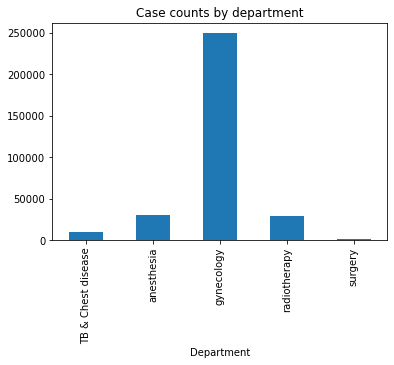

In [42]:
dept = df.groupby('Department').size()
dept.plot(kind='bar',title="Case counts by department")

<AxesSubplot:title={'center':'Case counts by ward type'}, xlabel='Ward_Type'>

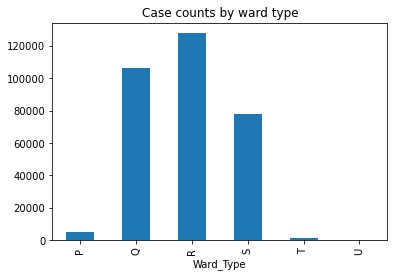

In [44]:
ward = df.groupby('Ward_Type').size()
ward.plot(kind='bar',title="Case counts by ward type")

<AxesSubplot:title={'center':'Case counts by age'}, xlabel='Age'>

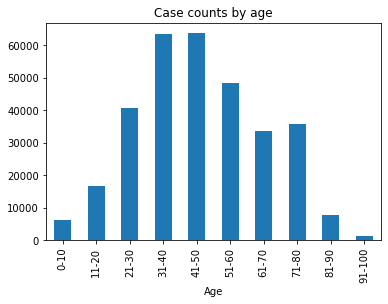

In [45]:
age = df.groupby('Age').size()
age.plot(kind='bar',title="Case counts by age")

In [225]:
map_stay

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 'More than 100 Days': 10}

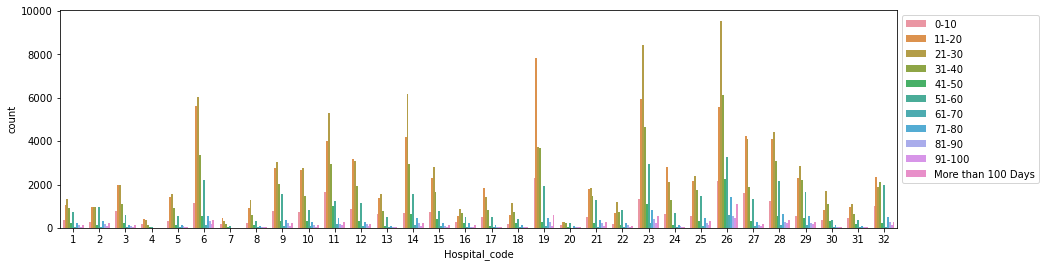

In [230]:
plt.subplots(figsize=(15,4))
g=sns.countplot(x='Hospital_code', hue='Stay', data=df)
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, map_stay.keys(), bbox_to_anchor=(1,1))
plt.show();

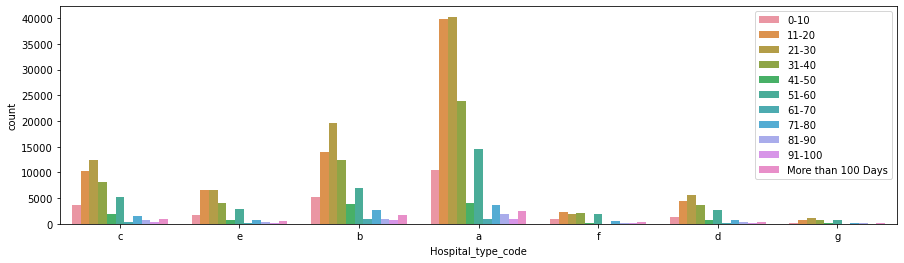

In [232]:
plt.subplots(figsize=(15,4))
g=sns.countplot(x='Hospital_type_code', hue='Stay', data=df)
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, map_stay.keys(), bbox_to_anchor=(1,1))
plt.show();

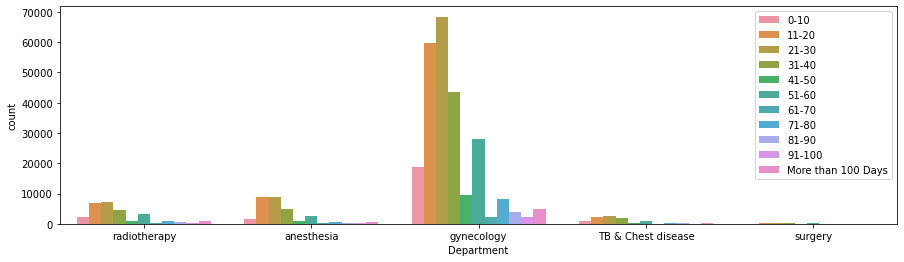

In [233]:
plt.subplots(figsize=(15,4))
g=sns.countplot(x='Department', hue='Stay', data=df)
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, map_stay.keys(), bbox_to_anchor=(1,1))
plt.show();

<AxesSubplot:xlabel='Ward_Type', ylabel='count'>

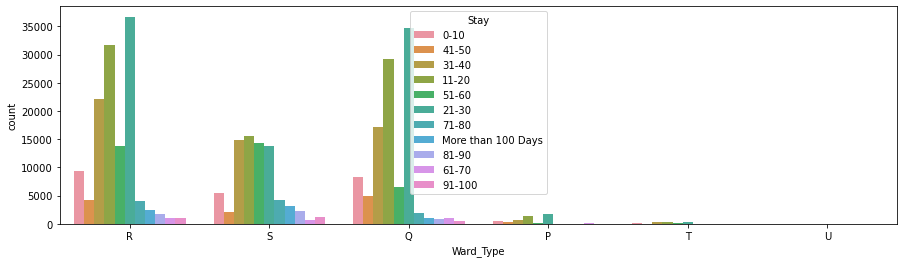

In [62]:
plt.subplots(figsize=(15,4))
sns.countplot(x='Ward_Type', hue='Stay', data=df)

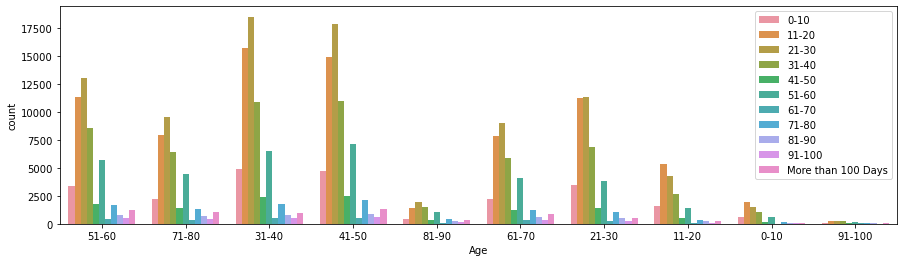

In [234]:
plt.subplots(figsize=(15,4))
g=sns.countplot(x='Age', hue='Stay', data=df)
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, map_stay.keys(), bbox_to_anchor=(1,1))
plt.show();

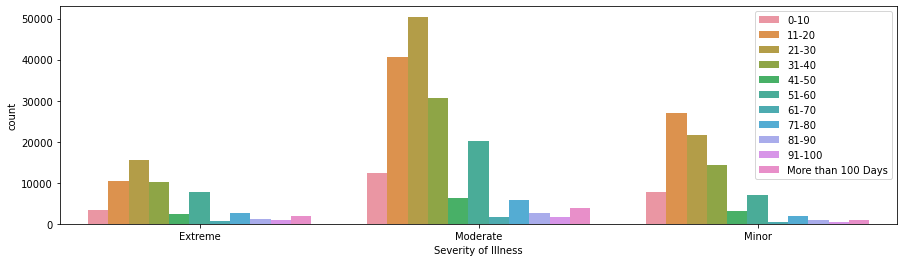

In [235]:
plt.subplots(figsize=(15,4))
g=sns.countplot(x='Severity of Illness', hue='Stay', data=df)
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, map_stay.keys(), bbox_to_anchor=(1,1))
plt.show();

In [254]:
%%html
<div class='tableauPlaceholder' id='viz1610602132215' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;LO&#47;LOS_16106021139880&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='LOS_16106021139880&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;LO&#47;LOS_16106021139880&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610602132215');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Data Wranggling

In [67]:
df.dtypes

Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

### Change categorical variables into ordinal numeric values

In [222]:
le=preprocessing.LabelEncoder()

In [89]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [110]:
#Hospital_type
df['Hospital_type_code']=le.fit_transform(df['Hospital_type_code'])
map_hospital_type = dict(zip(le.classes_, range(len(le.classes_))))

In [111]:
#Hospital_region_code
df['Hospital_region_code']=le.fit_transform(df['Hospital_region_code'])
map_hospital_region = dict(zip(le.classes_, range(len(le.classes_))))

In [112]:
#Department
df['Department']=le.fit_transform(df['Department'])
map_department = dict(zip(le.classes_, range(len(le.classes_))))

In [113]:
#Ward_Type
df['Ward_Type']=le.fit_transform(df['Ward_Type'])
map_ward = dict(zip(le.classes_, range(len(le.classes_))))

In [114]:
#Ward_Facility_Code
df['Ward_Facility_Code']=le.fit_transform(df['Ward_Facility_Code'])
map_ward_facility = dict(zip(le.classes_, range(len(le.classes_))))

In [115]:
#Type of Admission
df['Type of Admission']=le.fit_transform(df['Type of Admission'])
map_admission = dict(zip(le.classes_, range(len(le.classes_))))

In [116]:
#Severity of Illness
df['Severity of Illness']=le.fit_transform(df['Severity of Illness'])
map_severity = dict(zip(le.classes_, range(len(le.classes_))))

{'Extreme': 0, 'Minor': 1, 'Moderate': 2}

In [117]:
#Age
df['Age']=le.fit_transform(df['Age'])
map_age = dict(zip(le.classes_, range(len(le.classes_))))

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9}

In [223]:
#Stay
df['Stay']=le.fit_transform(df['Stay'])
map_stay = dict(zip(le.classes_, range(len(le.classes_))))

In [119]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


### replace NA's with mode

In [124]:
df['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [126]:
df["Bed Grade"].replace(np.nan, 2.0, inplace=True)

In [216]:
df['City_Code_Patient'].value_counts()

8.0     128543
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [128]:
df["City_Code_Patient"].replace(np.nan, 8.0, inplace=True)

<AxesSubplot:>

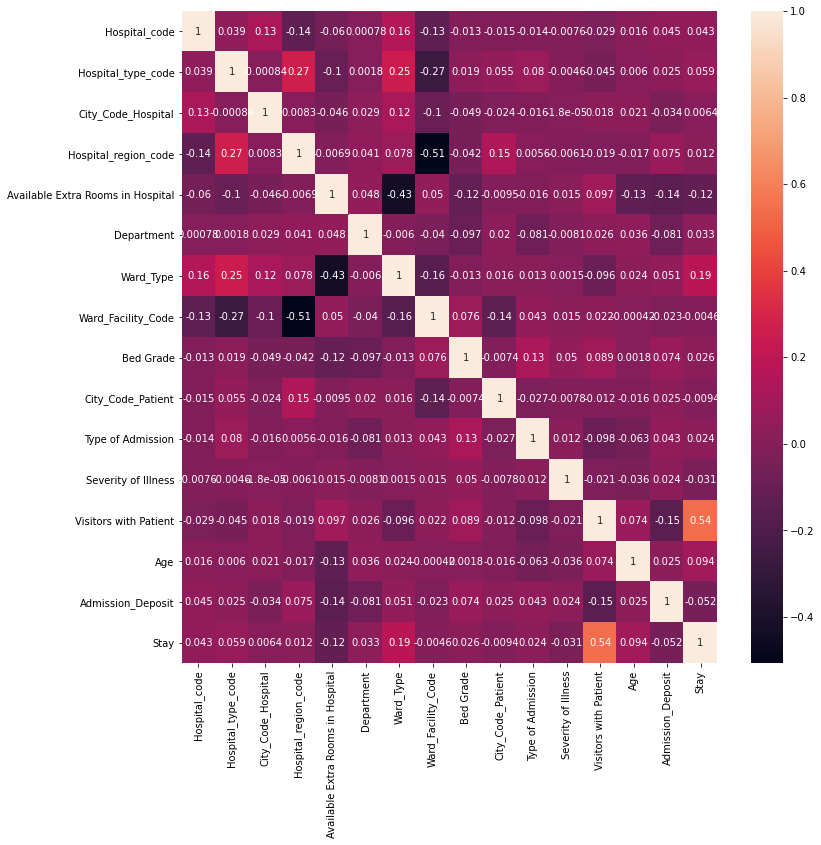

In [167]:
df=df.drop('patientid',axis=1)
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [168]:
y=df["Stay"]
X=df.loc[:,df.columns!='Stay']

In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [170]:
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)
preds = model.predict(X_test)
print('Baseline accuracy: ', accuracy_score(y_test, preds)*100, '%')

Baseline accuracy:  30.924192940585353 %


/Users/Yiwen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


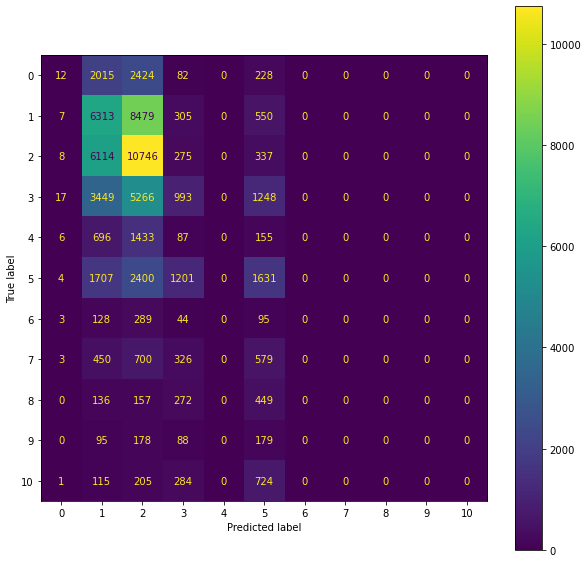

In [171]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test, ax=ax)

### Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [172]:
rfclassifier=RandomForestClassifier(criterion= 'entropy', max_depth= 15, n_estimators=60,random_state=0)
rfclassifier.fit(X_train,y_train)
rfpred=rfclassifier.predict(X_test)

In [173]:
print(classification_report(y_test, rfpred))

              precision    recall  f1-score   support

           0       0.43      0.13      0.20      4761
           1       0.42      0.49      0.45     15654
           2       0.42      0.67      0.51     17480
           3       0.42      0.23      0.30     10973
           4       0.19      0.00      0.00      2377
           5       0.39      0.49      0.44      6943
           6       0.25      0.00      0.00       559
           7       0.31      0.02      0.03      2058
           8       0.43      0.11      0.17      1014
           9       0.25      0.00      0.01       540
          10       0.55      0.43      0.48      1329

    accuracy                           0.42     63688
   macro avg       0.37      0.23      0.24     63688
weighted avg       0.41      0.42      0.38     63688



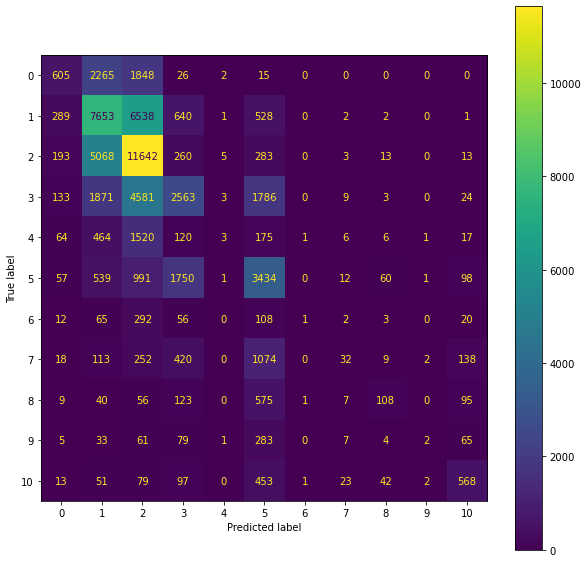

<Figure size 432x288 with 0 Axes>

In [174]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.figure()
plot_confusion_matrix(rfclassifier,X_test,y_test,ax=ax)

In [175]:
y_score=rfclassifier.predict_proba(X_test)
roc_auc_score(y_test,y_score,multi_class='ovo')

0.7746883652068656

In [181]:
importances=rfclassifier.feature_importances_

In [182]:
features=['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit']

In [208]:
feature_importances=dict(zip(features,importances))
a=dict(sorted(feature_importances.items(), key=lambda x: x[1]))

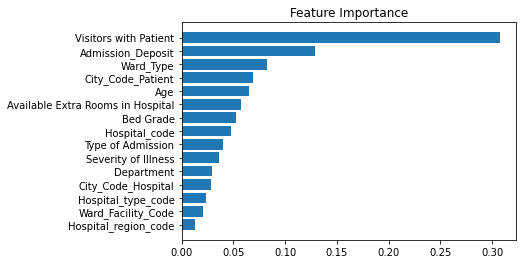

In [212]:
fi_plot=plt.barh(list(a.keys()),list(a.values()))
plt.title("Feature Importance")
plt.show()

2     98311
4     91709
3     91520
5     19288
6      7786
1      5582
7      2876
8      1027
9       218
10       67
11       17
0        15
12       13
21        3
13        2
20        2
14        1
24        1
Name: Available Extra Rooms in Hospital, dtype: int64

## References
1. https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/Downloads/highlights.pdf
2. https://www.npr.org/sections/health-shots/2020/12/07/944021201/new-covid-19-data-release-shows-where-hospitals-around-the-country-are-filling-u